In [1]:
# import necessary libraries
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

In [2]:
#Load dataset
df = pd.read_csv(r"C:\Users\ACER\Documents\Titanic-Dataset.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8

In [3]:
# Inspect Data structure
print("\n--- DATA INFO ---")
print(df.info())

print("\n--- SUMMARY STATISTICS ---")
print(df.describe(include="all"))


--- DATA INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

--- SUMMARY STATISTICS ---
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN     


 --- MISSING VALUES ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


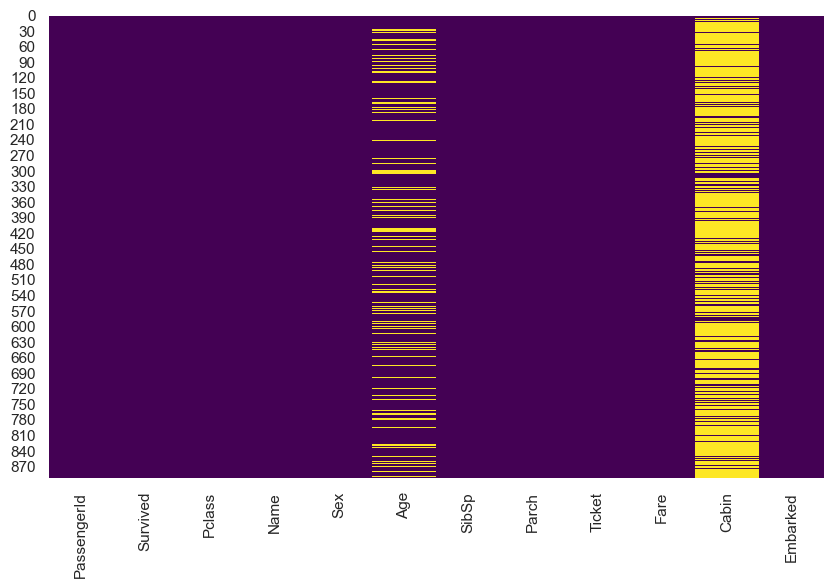

In [4]:
# Checkig Missing Values
print("\n --- MISSING VALUES ---")
print(df.isnull().sum())


sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.show()

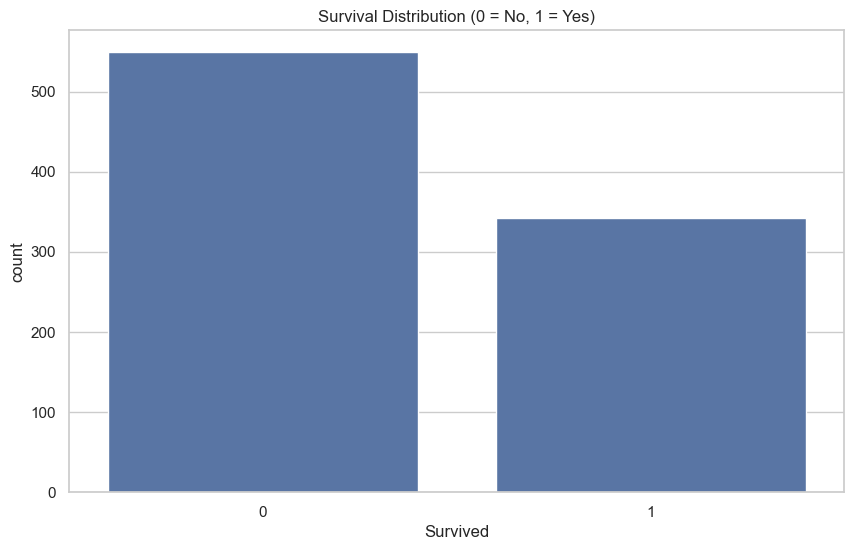

Survival Rate: 0.3838383838383838


In [5]:
# Survival Distribution

sns.countplot(x='Survived', data=df)
plt.title("Survival Distribution (0 = No, 1 = Yes)")
plt.show()

print("Survival Rate:", df['Survived'].mean())

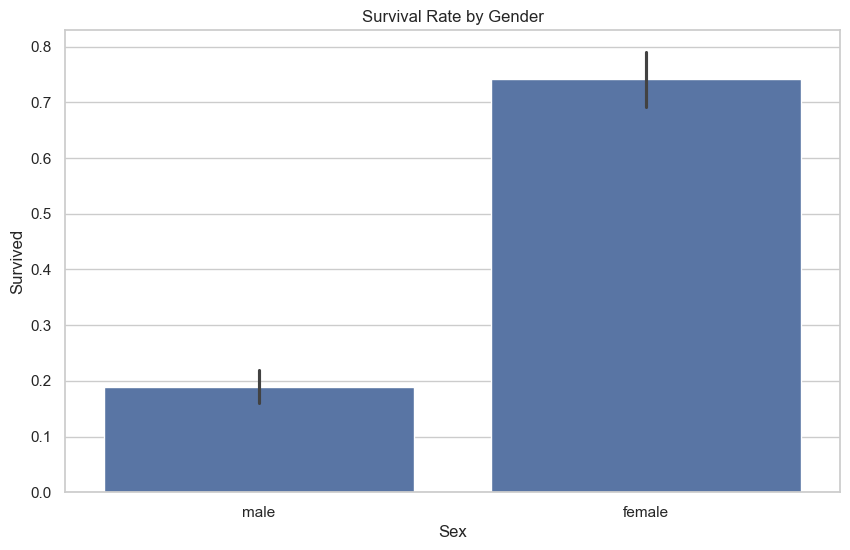

In [6]:
# Survial by Gender
sns.barplot(x="Sex", y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

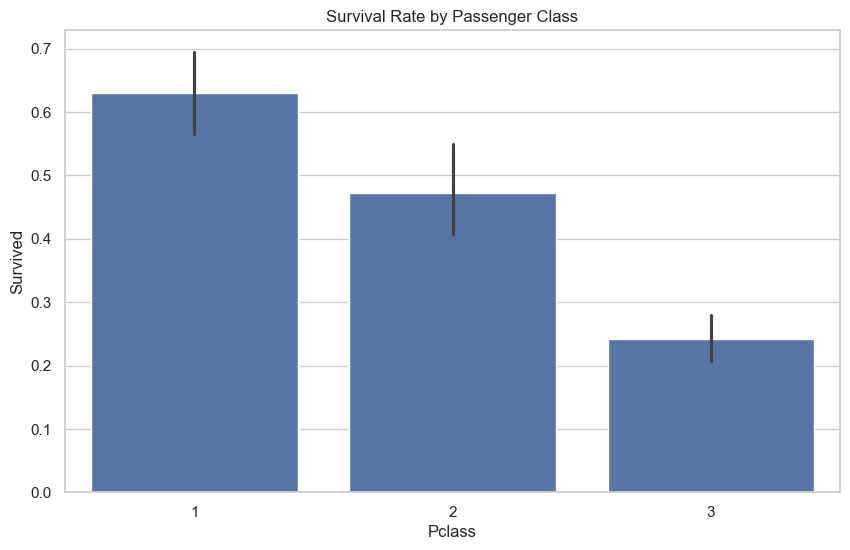

In [7]:
# Survival by Passanger Class
sns.barplot(x='Pclass', y= 'Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

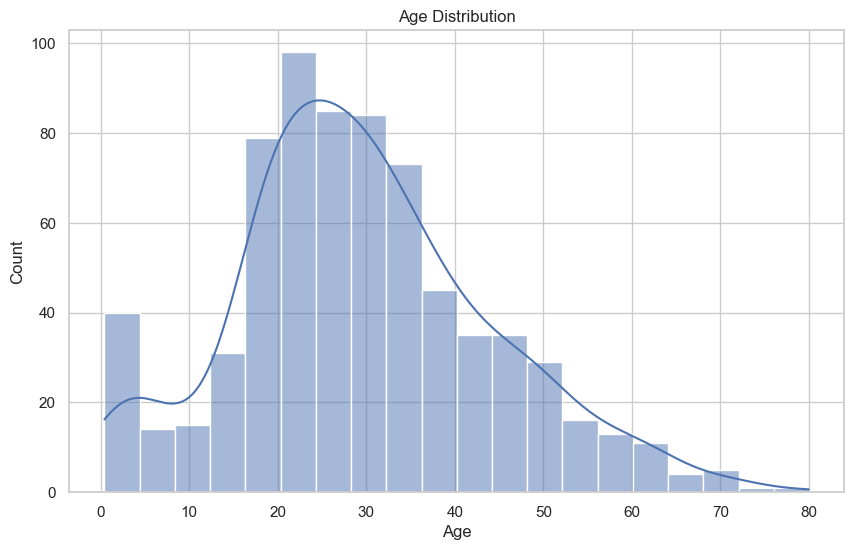

C:\Users\ACER\AppData\Local\Temp\ipykernel_3660\744674327.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived')
C:\Users\ACER\AppData\Local\Temp\ipykernel_3660\744674327.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Died')


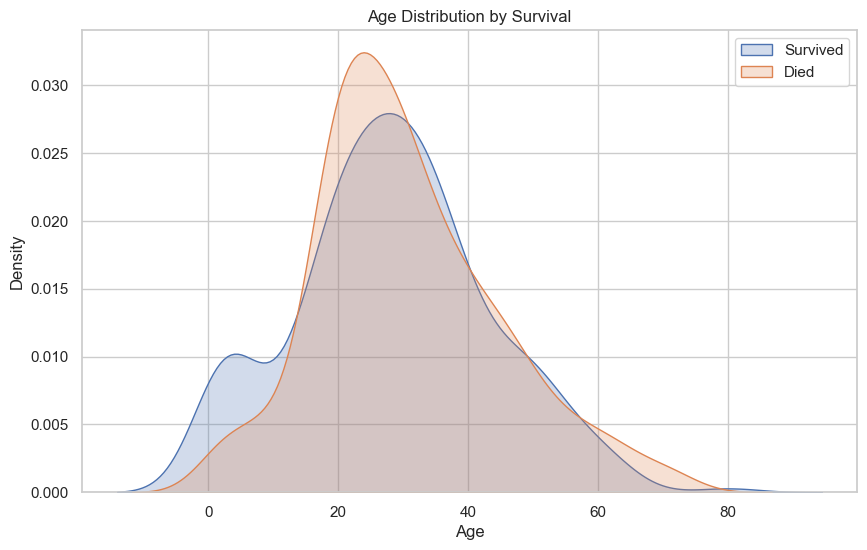

In [8]:
# Agee Distibution and Survival by Age
sns.histplot(df["Age"].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

sns.kdeplot(df[df['Survived'] == 1]['Age'], shade=True, label='Survived')
sns.kdeplot(df[df['Survived'] == 0]['Age'], shade=True, label='Died')
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()

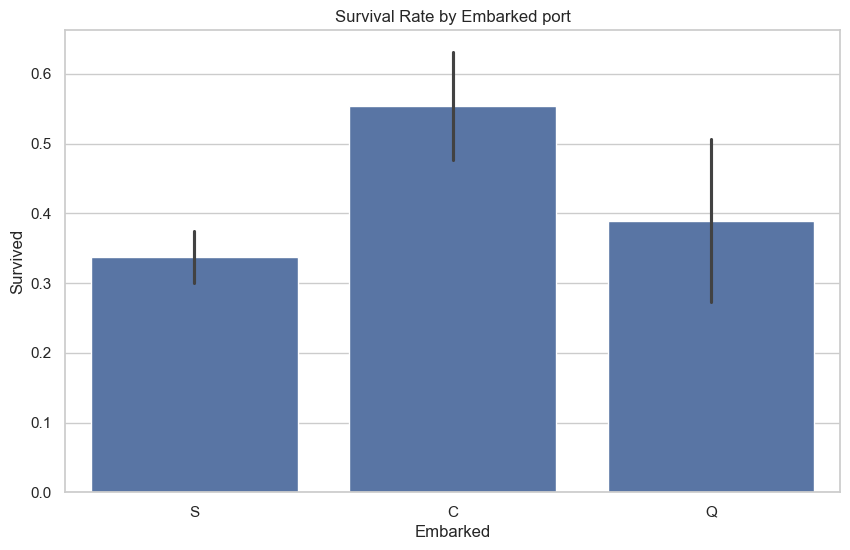

In [9]:
# Survival by Embarked

sns.barplot(x='Embarked', y='Survived', data=df)
plt.title("Survival Rate by Embarked port")
plt.show()

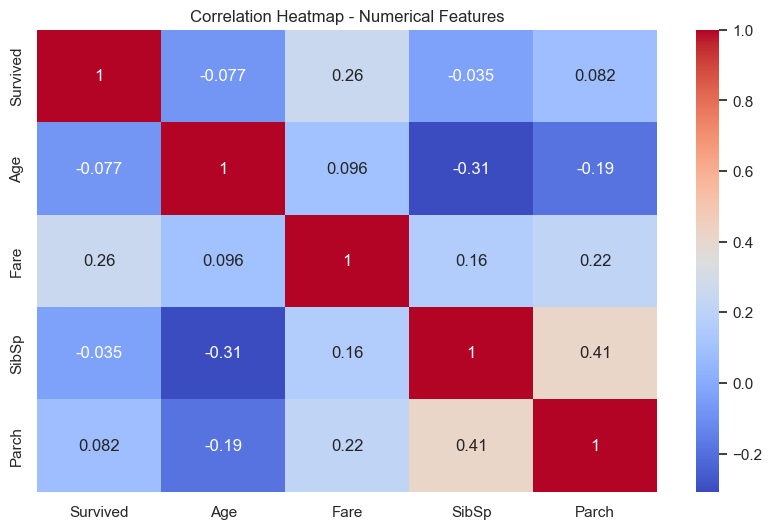

In [10]:
# Correlation Heatmap(Numerical Features) Relationship between the numerical features

N_features = ['Survived', 'Age', 'Fare', 'SibSp', 'Parch']

corr = df[N_features].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Numerical Features")
plt.show()

In [11]:
# Key Insights (Print Summary)

print("\n=== PHASE 2 - KEY INSIGHT SUMMARY ===")
print("1. Female survived at much higher rates than a males.")
print("2. First-class passenger had higher survival rates then the lower classes.")
print("3. Children (0-12) survived more frequently than adults.")
print("4. Passengers embarked from Cherbourg showed higher survival rates.")
print("5. Fare has a positive relationship with survival probability.")
print("=== END OF PHASE 2 ===")


=== PHASE 2 - KEY INSIGHT SUMMARY ===
1. Female survived at much higher rates than a males.
2. First-class passenger had higher survival rates then the lower classes.
3. Children (0-12) survived more frequently than adults.
4. Passengers embarked from Cherbourg showed higher survival rates.
5. Fare has a positive relationship with survival probability.
=== END OF PHASE 2 ===


In [12]:
# DATA CLEANING
df_clean = pd.read_csv(r"C:\Users\ACER\Documents\Titanic-Dataset.csv")
# Cleaning colum names
df_clean.columns = df_clean.columns.str.strip() 

In [13]:
# Handle Missing Values
# Age Inpute with median 
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

# Embarked Fill ie the most occurrence value in the column
df_clean['Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

# Cabin Replace missing with "Missing"
df_clean['Cabin'] = df_clean['Cabin'].fillna('Missing')

In [14]:
# Drop/Prepare Columns

# Ticket column is inconsistent
if "Ticket" in df_clean.columns:
    df_clean = df_clean.drop(columns=['Ticket'])

In [15]:
# Standardize Text Values
text_cols = ['Sex', 'Embarked', 'Cabin', 'Name']

for col in text_cols:
    df_clean[col].astype(str).str.strip()

In [16]:
# Verify Cleaning Results

print("\n--- MISSING VALEUS AFTER CLEANING ---")
print(df_clean.isnull().sum())

print("\n--- CLEAN SAMPLE ---")
print(df_clean.head())

df_clean.to_csv('cleaned_titanic.csv', index=False)
print('Cleaned dataset saved as cleaned_titanic.csv')


--- MISSING VALEUS AFTER CLEANING ---
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
dtype: int64

--- CLEAN SAMPLE ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare    Cabin Embarked  
0      0   7.2500  Mi

In [17]:
# Feature Engineering 
import pandas as pd
import numpy as np

# Load cleaned dataset 
df_fe = pd.read_csv("cleaned_titanic.csv")
print(df_fe.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch     Fare    Cabin Embarked  
0      0   7.2500  Missing        S  
1      0  71.2833      C85        C  
2      0   7.9250  Missing        S  
3      0  53.1000     C123        S  
4      0   8.0500  Missing        S  


In [18]:
# Defining FamilySize by add FamilySize = SibSp + Parch and IsAlone =1 if FamilySize == 0 else 0

df_fe['FamilySize'] = df_fe['SibSp'] + df_fe['Parch']

df_fe['IsAlone'] = np.where(df_fe['FamilySize'] == 0,1,0)

In [19]:
# Title Extraction From Name

# Extract title using regex
df_fe['Title'] = df_fe['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

# Normalize rare titles
rare_titles = [
    "Lady", "Countess", "Capt", "Col", "Don", "Dr",
    "Major", "Rev", "Sir", "Jonkheer", "Dona"
]

df_fe['Title'] = df_fe["Title"].replace(rare_titles, 'Rare')
df_fe['Title'] = df_fe['Title'].replace({
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs"
})

In [20]:
# Age Bands Feature Engineering

df_fe["AgeBand"] = pd.cut(
    df_fe["Age"],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']
)

In [21]:
# Feature Fare per Person

df_fe['FarePerPerson'] = df_fe['Fare'] /(df_fe['FamilySize'] + 1)

In [22]:
# Drop Redundant Columns
df_fe = df_fe.drop(columns=['Name'])

In [23]:
# Verify Feature Engineering Results
print("\n--- Feature Engineering Columns ---")
print(df_fe.columns)

print("\n--- Sample Feature Engineered Data ---")
print(df_fe.head())

print("\nData Shape After Feature Engineering:", df_fe.shape)


--- Feature Engineering Columns ---
Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone', 'Title',
       'AgeBand', 'FarePerPerson'],
      dtype='object')

--- Sample Feature Engineered Data ---
   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    male  22.0      1      0   7.2500   
1            2         1       1  female  38.0      1      0  71.2833   
2            3         1       3  female  26.0      0      0   7.9250   
3            4         1       1  female  35.0      1      0  53.1000   
4            5         0       3    male  35.0      0      0   8.0500   

     Cabin Embarked  FamilySize  IsAlone Title      AgeBand  FarePerPerson  
0  Missing        S           1        0    Mr  Young Adult        3.62500  
1      C85        C           1        0   Mrs        Adult       35.64165  
2  Missing        S           0        1  Miss  Y

In [24]:
# Save Feature-Engineered Dataset

df_fe.to_csv("feature_engineered_titanic.csv, index=False")
print("Feature-engineered dataset saved as feature_engineered_titanic.csv")

Feature-engineered dataset saved as feature_engineered_titanic.csv


In [25]:
# MODELING
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

# Load feature-engineered data
df_model = pd.read_csv("feature_engineered_titanic.csv, index=False")
print(df_model.head())

   Unnamed: 0  PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0           0            1         0       3    male  22.0      1      0   
1           1            2         1       1  female  38.0      1      0   
2           2            3         1       3  female  26.0      0      0   
3           3            4         1       1  female  35.0      1      0   
4           4            5         0       3    male  35.0      0      0   

      Fare    Cabin Embarked  FamilySize  IsAlone Title      AgeBand  \
0   7.2500  Missing        S           1        0    Mr  Young Adult   
1  71.2833      C85        C           1        0   Mrs        Adult   
2   7.9250  Missing        S           0        1  Miss  Young Adult   
3  53.1000     C123        S           1        0   Mrs  Young Adult   
4   8.0500  Missing        S           0        1    Mr  Young Adult   

   FarePerPerson  
0        3.62500  
1       35.64165  
2        7.92500  
3       26.55000  
4        8.0500

In [26]:
# Seperate Features and Target Variable

X = df_model.drop("Survived", axis=1)
y = df_model['Survived']

In [27]:
# Train / Validate split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print("Training Set:", X_train.shape)
print("Validation:", X_val.shape)

Training Set: (712, 15)
Validation: (179, 15)


In [28]:
# Define Feature Types

categorical_features = [
    'Sex',
    'Embarked',
    'Cabin',
    'Title',
    'AgeBand',
    'Pclass'
]

numerical_features = [
    'Age',
    'Fare',
    'FarePerPerson',
    'SibSp',
    'Parch',
    'FamilySize',
    'IsAlone'
]

In [29]:
# Preprocessing Pipeline Encoding categorical variable + Scaling numerical features

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features)
    ]
)

In [30]:
# Model definiton
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(
        n_estimators=200,
        random_state=42
    )
}

In [32]:
# Tain and Evaluate Model
results = {}

for model_name, model in models.items():
    pipeline = Pipeline(
        steps=[
            ('preprocessing', preprocessor),
            ('classifier', model)
        ]
    )

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_val)

    results[model_name] = {
        'Accuracy': accuracy_score(y_val, y_pred),
        'Precision': precision_score(y_val, y_pred),
        'Recall': recall_score(y_val, y_pred),
        'F1 Score': f1_score(y_val, y_pred),
        'Confusion Matrix': confusion_matrix(y_val, y_pred)
    }

In [35]:
# Display Model Performance

for model_name, metrics in results.items():
    print(f"\n=== {model_name} ===")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1 Score: {metrics['F1 Score']:.4f}")
    print("Confusion Matrix:")
    print(metrics['Confusion Matrix'])


=== Logistic Regression ===
Accuracy: 0.8436
Precision: 0.8060
Recall: 0.7826
F1 Score: 0.7941
Confusion Matrix:
[[97 13]
 [15 54]]

=== Decision Tree ===
Accuracy: 0.8101
Precision: 0.7612
Recall: 0.7391
F1 Score: 0.7500
Confusion Matrix:
[[94 16]
 [18 51]]

=== Random Forest ===
Accuracy: 0.7933
Precision: 0.7424
Recall: 0.7101
F1 Score: 0.7259
Confusion Matrix:
[[93 17]
 [20 49]]


In [37]:

#  FINAL PREDICTION


import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load feature-engineered TRAINING data
train_df = pd.read_csv("feature_engineered_titanic.csv, index=False")

# Load Kaggle TEST data (no Survived column)
test_df = pd.read_csv(r"C:\Users\ACER\Downloads\archive\test.csv")  # adjust path if needed

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (891, 16)
Test shape: (418, 11)


In [38]:

# Handle missing values 

test_df["Age"] = test_df["Age"].fillna(train_df["Age"].median())
test_df["Embarked"] = test_df["Embarked"].fillna(
    test_df["Embarked"].mode()[0]
)
test_df["Cabin"] = test_df["Cabin"].fillna("Missing")

# Drop Ticket
if "Ticket" in test_df.columns:
    test_df = test_df.drop(columns=["Ticket"])


# Feature Engineering
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"]
test_df["IsAlone"] = np.where(test_df["FamilySize"] == 0, 1, 0)

test_df["Title"] = test_df["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)

rare_titles = [
    "Lady", "Countess", "Capt", "Col", "Don", "Dr",
    "Major", "Rev", "Sir", "Jonkheer", "Dona"
]

test_df["Title"] = test_df["Title"].replace(rare_titles, "Rare")
test_df["Title"] = test_df["Title"].replace({
    "Mlle": "Miss",
    "Ms": "Miss",
    "Mme": "Mrs"
})

test_df["AgeBand"] = pd.cut(
    test_df["Age"],
    bins=[0, 12, 18, 35, 60, 100],
    labels=["Child", "Teen", "Young Adult", "Adult", "Senior"]
)

test_df["FarePerPerson"] = test_df["Fare"] / (test_df["FamilySize"] + 1)

# Drop Name (already used)
test_df = test_df.drop(columns=["Name"])


In [39]:
X_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]

X_test = test_df.copy()


In [40]:
categorical_features = [
    "Sex",
    "Embarked",
    "Cabin",
    "Title",
    "AgeBand",
    "Pclass"
]

numerical_features = [
    "Age",
    "Fare",
    "FarePerPerson",
    "SibSp",
    "Parch",
    "FamilySize",
    "IsAlone"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numerical_features)
    ]
)


In [41]:
final_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=300,
            random_state=42
        ))
    ]
)

final_model.fit(X_train, y_train)
print("Final model trained on full training dataset.")


Final model trained on full training dataset.


In [43]:
pd.cut(test_df["Age"], bins=[0, 12, 18, 35, 60, 100], labels=["Child", "Teen", "Young Adult", "Adult", "Senior"])


0      Young Adult
1            Adult
2           Senior
3      Young Adult
4      Young Adult
          ...     
413    Young Adult
414          Adult
415          Adult
416    Young Adult
417    Young Adult
Name: Age, Length: 418, dtype: category
Categories (5, object): ['Child' < 'Teen' < 'Young Adult' < 'Adult' < 'Senior']

In [44]:
X_test.isnull().sum().sort_values(ascending=False)


Fare             1
FarePerPerson    1
PassengerId      0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Cabin            0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
AgeBand          0
dtype: int64

In [45]:
from sklearn.impute import SimpleImputer
categorical_features = [
    "Sex",
    "Embarked",
    "Cabin",
    "Title",
    "AgeBand",
    "Pclass"
]

numerical_features = [
    "Age",
    "Fare",
    "FarePerPerson",
    "SibSp",
    "Parch",
    "FamilySize",
    "IsAlone"
]

categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]
)

numerical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("num", numerical_transformer, numerical_features)
    ]
)


In [46]:
final_model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("classifier", RandomForestClassifier(
            n_estimators=300,
            random_state=42
        ))
    ]
)

final_model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Sex', 'Embarked', 'Cabin',
                                                   'Title', 'AgeBand',
                                                   'Pclass']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare',
                                                   'FarePerPerson', 'SibSp',
                                                   'Parch', 'FamilySize',
                                                   'IsAlone'])])),
                ('classifier',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [47]:
test_predictions = final_model.predict(X_test)

In [48]:
print(test_predictions)

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0
 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1
 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 1]


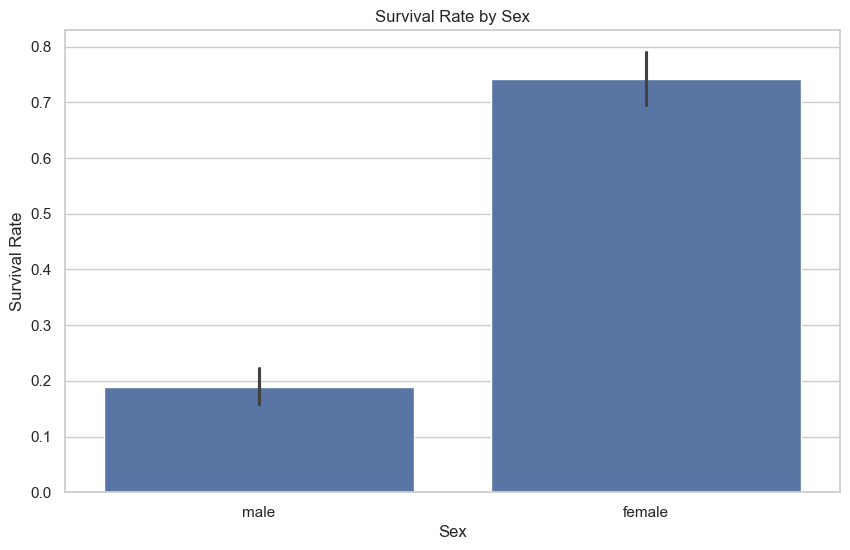

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df_model, x="Sex", y="Survived")
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()


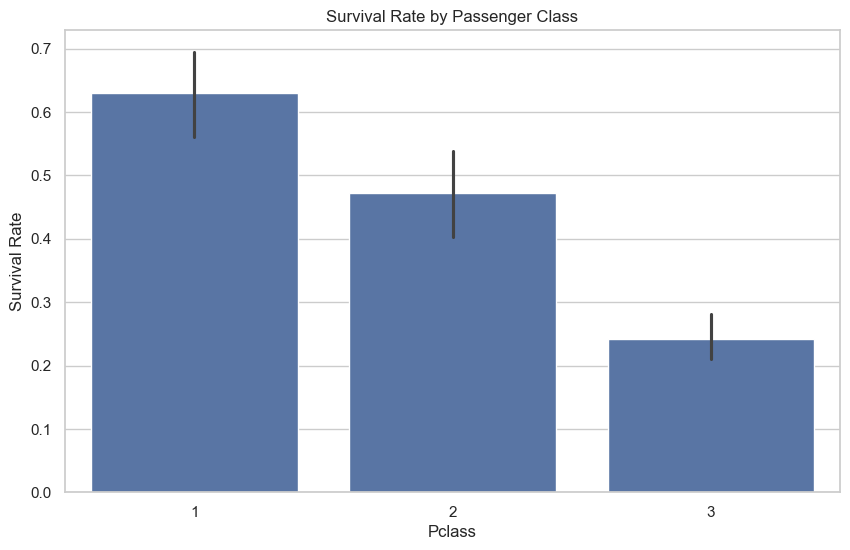

In [50]:
sns.barplot(data=df_model, x="Pclass", y="Survived")
plt.title("Survival Rate by Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


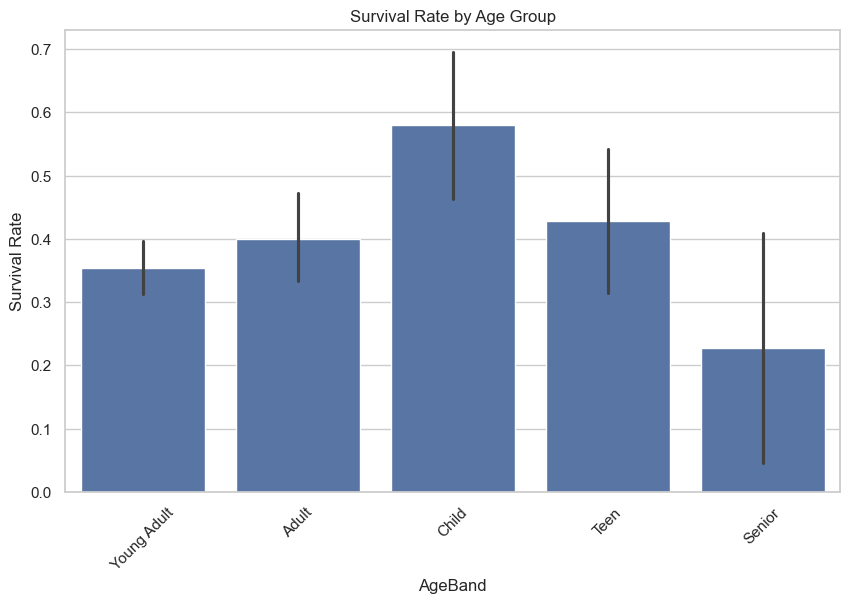

In [51]:
sns.barplot(data=df_model, x="AgeBand", y="Survived")
plt.title("Survival Rate by Age Group")
plt.ylabel("Survival Rate")
plt.xticks(rotation=45)
plt.show()


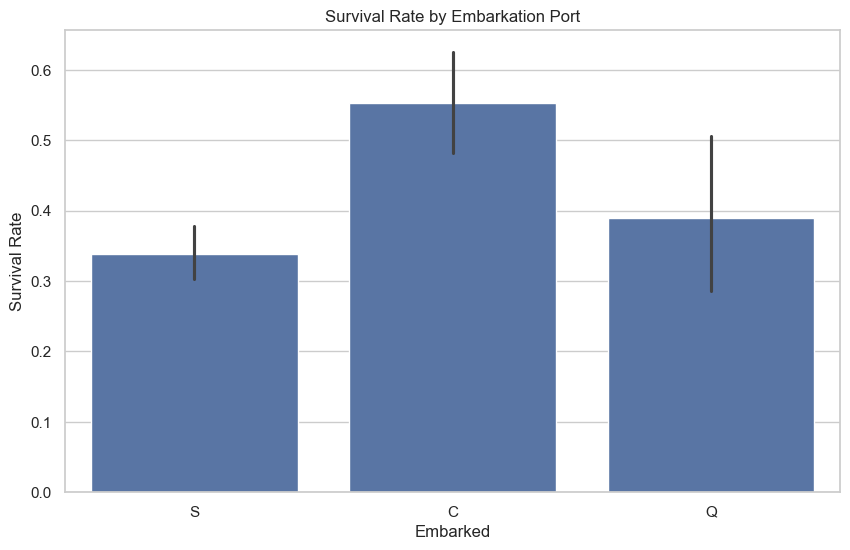

In [52]:
sns.barplot(data=df_model, x="Embarked", y="Survived")
plt.title("Survival Rate by Embarkation Port")
plt.ylabel("Survival Rate")
plt.show()


In [53]:
feature_names = (
    final_model.named_steps["preprocessing"]
    .get_feature_names_out()
)

importances = final_model.named_steps["classifier"].feature_importances_

feature_importance_df = (
    pd.DataFrame({
        "Feature": feature_names,
        "Importance": importances
    })
    .sort_values(by="Importance", ascending=False)
    .head(15)
)


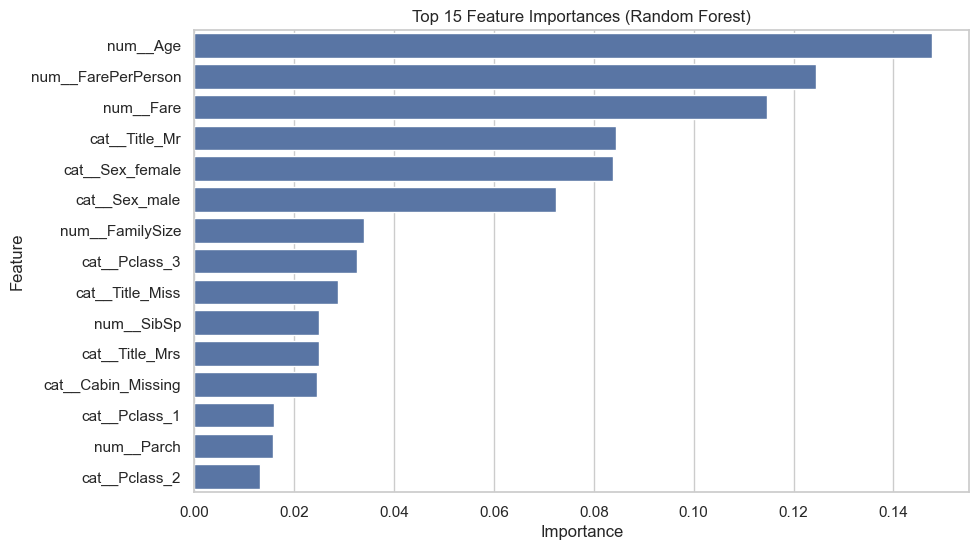

In [54]:
sns.barplot(
    data=feature_importance_df,
    x="Importance",
    y="Feature"
)
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()


In [55]:
model_comparison = pd.DataFrame(results).T[
    ["Accuracy", "Precision", "Recall", "F1 Score"]
]

model_comparison


,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.843575,0.80597,0.782609,0.794118
Decision Tree,0.810056,0.761194,0.73913,0.75
Random Forest,0.793296,0.742424,0.710145,0.725926


In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

final_log_reg_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        solver="liblinear",
        random_state=42
    ))
])


In [58]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_cv_scores = cross_val_score(
    final_log_reg_model,
    X,
    y,
    cv=cv,
    scoring="f1"
)

print("Logistic Regression CV F1 Scores:", log_reg_cv_scores)
print("Mean CV F1 Score:", log_reg_cv_scores.mean())


Logistic Regression CV F1 Scores: [0.79411765 0.77941176 0.76190476 0.77862595 0.79411765]
Mean CV F1 Score: 0.7816355549853528


In [59]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],
    "classifier__penalty": ["l2"],
    "classifier__solver": ["liblinear"]
}

grid_search = GridSearchCV(
    estimator=final_log_reg_model,
    param_grid=param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_search.fit(X, y)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated F1 Score:", grid_search.best_score_)


Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best Cross-Validated F1 Score: 0.7757682994788228


In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline

gb_model = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)

gb_preds = gb_model.predict(X_val)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

gb_results = {
    "Accuracy": accuracy_score(y_val, gb_preds),
    "Precision": precision_score(y_val, gb_preds),
    "Recall": recall_score(y_val, gb_preds),
    "F1 Score": f1_score(y_val, gb_preds)
}

gb_results


{'Accuracy': 0.8938547486033519,
 'Precision': 0.8676470588235294,
 'Recall': 0.855072463768116,
 'F1 Score': 0.8613138686131386}